In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd

In [2]:
df_1 = pd.read_csv("real_electronic_sim_1.txt", sep="	")
df_1

time  V(input_1-50pe)        V(out)     V(out_fs)  \
0       0.000000e+00         0.000000  5.000000e-09  0.000000e+00   
1       2.650884e-09         0.000006  5.000000e-09  1.699336e-09   
2       2.695470e-09         0.000092  5.000000e-09 -7.049479e-07   
3       2.740056e-09         0.000171  5.000000e-09 -4.735440e-07   
4       2.784642e-09         0.000244  5.000000e-09  6.959110e-07   
...              ...              ...           ...           ...   
290986  3.277409e-05         0.000029  5.000000e-09  1.538984e-10   
290987  3.283854e-05         0.000029  5.000000e-09  1.763009e-09   
290988  3.296745e-05         0.000029  5.000000e-09 -3.225667e-10   
290989  3.299967e-05         0.000029  5.000000e-09  9.861679e-10   
290990  3.300000e-05         0.000029  5.000000e-09  9.979211e-10   

        V(out_preamp)  
0        0.000000e+00  
1       -8.661727e-08  
2       -1.815336e-06  
3       -5.200032e-06  
4       -1.024070e-05  
...               ...  
290986  -2.945487e-04  
290987  -2.945487e-04  
290988  -2.945487e-04  
290989  -2.945487e-04  
290990  -2.945487e-04  

[290991 rows x 5 columns]

(3.0000000000000004e-05, 3.2000000000000005e-05)

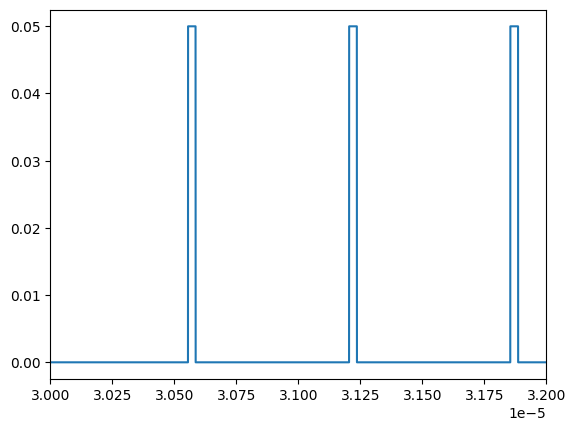

In [12]:
plt.plot(df_1["time"],df_1["V(out)"])
plt.xlim(3*10**-5,3.2*10**-5)

In [5]:
pulse_widths_1 = []
threshold = 0.02  # 50 mV threshold (I put it a bit lower to ensure I am accurate)
pulse_start_time = None

for index, row in df_1.iterrows():
    if row['V(out)'] > threshold and (pulse_start_time is None or df_1['V(out)'].iloc[index-1] <= threshold):
        # Rising edge detected
        pulse_start_time = row['time']
    elif row['V(out)'] <= threshold and pulse_start_time is not None and df_1['V(out)'].iloc[index-1] > threshold:
        # Falling edge detected
        pulse_end_time = row['time']
        # Calculate pulse width
        width = (pulse_end_time - pulse_start_time) / 3.125e-9
        pulse_widths_1.append(width)
        # Reset pulse_start_time
        pulse_start_time = None

# Convert pulse_widths to a DataFrame and approximate to the closest lower integer
pulse_widths_df_1 = pd.DataFrame(np.floor(pulse_widths_1), columns=['Pulse Width (divided by 3.125 ns)'])
print(pulse_widths_df_1)

    Pulse Width (divided by 3.125 ns)
0                                 2.0
1                                 5.0
2                                 6.0
3                                 6.0
4                                 7.0
5                                 7.0
6                                 8.0
7                                 8.0
8                                 8.0
9                                 8.0
10                                8.0
11                                8.0
12                                8.0
13                                8.0
14                                8.0
15                                8.0
16                                9.0
17                                9.0
18                                9.0
19                                9.0
20                                9.0
21                                9.0
22                                9.0
23                                9.0
24                                9.0
25          

In [6]:
df_2 = pd.read_csv("real_electronic_sim_2.txt", sep="	")
print(df_2)

pulse_widths_2 = []
threshold = 0.02  # 50 mV threshold (I put it a bit lower to ensure I am accurate)
pulse_start_time = None

for index, row in df_2.iterrows():
    if row['V(out)'] > threshold and (pulse_start_time is None or df_2['V(out)'].iloc[index-1] <= threshold):
        # Rising edge detected
        pulse_start_time = row['time']
    elif row['V(out)'] <= threshold and pulse_start_time is not None and df_2['V(out)'].iloc[index-1] > threshold:
        # Falling edge detected
        pulse_end_time = row['time']
        # Calculate pulse width
        width = (pulse_end_time - pulse_start_time) / 3.125e-9
        pulse_widths_2.append(width)
        # Reset pulse_start_time
        pulse_start_time = None

# Convert pulse_widths to a DataFrame and approximate to the closest lower integer
pulse_widths_df_2 = pd.DataFrame(np.floor(pulse_widths_2), columns=['Pulse Width (divided by 3.125 ns)'])
print(pulse_widths_df_2)

                time  V(input_1-50pe)        V(out)     V(out_fs)  \
0       0.000000e+00         0.000000  5.000000e-09  0.000000e+00   
1       5.256752e-09         0.000004  5.000000e-09  5.256684e-11   
2       5.278045e-09         0.000025  5.000000e-09 -4.683195e-08   
3       5.299338e-09         0.000049  5.000000e-09 -4.182744e-08   
4       5.320631e-09         0.000074  5.000000e-09  1.506609e-08   
...              ...              ...           ...           ...   
291612  3.280369e-05         0.000032  5.000000e-09 -3.433456e-08   
291613  3.286814e-05         0.000032  5.000000e-09 -2.464213e-08   
291614  3.293259e-05         0.000032  5.000000e-09  5.641875e-10   
291615  3.299705e-05         0.000032  5.000000e-09  8.496202e-10   
291616  3.300000e-05         0.000032  5.000000e-09  9.667829e-10   

        V(out_preamp)  
0        0.000000e+00  
1       -1.602506e-08  
2       -7.726483e-08  
3       -4.946457e-07  
4       -1.268168e-06  
...               ...  
291

In [7]:
df_3 = pd.read_csv("real_electronic_sim_3.txt", sep="	")
print(df_3)

pulse_widths_3 = []
threshold = 0.02  # 50 mV threshold (I put it a bit lower to ensure I am accurate)
pulse_start_time = None

for index, row in df_3.iterrows():
    if row['V(out)'] > threshold and (pulse_start_time is None or df_3['V(out)'].iloc[index-1] <= threshold):
        # Rising edge detected
        pulse_start_time = row['time']
    elif row['V(out)'] <= threshold and pulse_start_time is not None and df_3['V(out)'].iloc[index-1] > threshold:
        # Falling edge detected
        pulse_end_time = row['time']
        # Calculate pulse width
        width = (pulse_end_time - pulse_start_time) / 3.125e-9
        pulse_widths_3.append(width)
        # Reset pulse_start_time
        pulse_start_time = None

# Convert pulse_widths to a DataFrame and approximate to the closest lower integer
pulse_widths_df_3 = pd.DataFrame(np.floor(pulse_widths_3), columns=['Pulse Width (divided by 3.125 ns)'])
print(pulse_widths_df_3)

                time  V(input_1-50pe)        V(out)     V(out_fs)  \
0       0.000000e+00         0.000000  5.000000e-09  0.000000e+00   
1       3.551184e-09         0.000004  5.000000e-09  1.037750e-09   
2       3.598056e-09         0.000087  5.000000e-09 -7.676006e-07   
3       3.644929e-09         0.000164  5.000000e-09 -5.281137e-07   
4       3.691802e-09         0.000234  5.000000e-09  7.194983e-07   
...              ...              ...           ...           ...   
290523  3.266034e-05         0.000034  5.000000e-09 -9.378960e-07   
290524  3.274782e-05         0.000034  5.000000e-09 -6.795851e-07   
290525  3.283529e-05         0.000034  5.000000e-09  1.817845e-09   
290526  3.299642e-05         0.000034  5.000000e-09  8.124881e-10   
290527  3.300000e-05         0.000034  5.000000e-09  9.600934e-10   

        V(out_preamp)  
0        0.000000e+00  
1       -5.289541e-08  
2       -1.774853e-06  
3       -5.166881e-06  
4       -1.022898e-05  
...               ...  
290

In [8]:
df_4 = pd.read_csv("real_electronic_sim_4.txt", sep="	")
print(df_4)

pulse_widths_4 = []
threshold = 0.02  # 50 mV threshold (I put it a bit lower to ensure I am accurate)
pulse_start_time = None

for index, row in df_4.iterrows():
    if row['V(out)'] > threshold and (pulse_start_time is None or df_4['V(out)'].iloc[index-1] <= threshold):
        # Rising edge detected
        pulse_start_time = row['time']
    elif row['V(out)'] <= threshold and pulse_start_time is not None and df_4['V(out)'].iloc[index-1] > threshold:
        # Falling edge detected
        pulse_end_time = row['time']
        # Calculate pulse width
        width = (pulse_end_time - pulse_start_time) / 3.125e-9
        pulse_widths_4.append(width)
        # Reset pulse_start_time
        pulse_start_time = None

# Convert pulse_widths to a DataFrame and approximate to the closest lower integer
pulse_widths_df_4 = pd.DataFrame(np.floor(pulse_widths_4), columns=['Pulse Width (divided by 3.125 ns)'])
print(pulse_widths_df_4)

                time  V(input_1-50pe)        V(out)     V(out_fs)  \
0       0.000000e+00         0.000000  5.000000e-09  0.000000e+00   
1       1.204401e-09         0.000009  5.000000e-09  4.256670e-10   
2       1.250703e-09         0.000095  5.000000e-09 -7.815180e-07   
3       1.297004e-09         0.000174  5.000000e-09 -5.248087e-07   
4       1.343305e-09         0.000247  5.000000e-09  7.705538e-07   
...              ...              ...           ...           ...   
290396  3.289085e-05         0.000032  5.000000e-09  2.263761e-09   
290397  3.292768e-05         0.000032  5.000000e-09  1.502399e-09   
290398  3.296451e-05         0.000032  5.000000e-09 -3.032325e-10   
290399  3.299674e-05         0.000032  5.000000e-09  8.127617e-10   
290400  3.300000e-05         0.000032  5.000000e-09  9.463927e-10   

        V(out_preamp)  
0        0.000000e+00  
1       -3.969190e-08  
2       -1.914579e-06  
3       -5.507789e-06  
4       -1.081932e-05  
...               ...  
290

In [13]:
df_5 = pd.read_csv("real_electronic_sim_5.txt", sep="	")
print(df_5)

pulse_widths_5 = []
threshold = 0.02  # 50 mV threshold (I put it a bit lower to ensure I am accurate)
pulse_start_time = None

for index, row in df_5.iterrows():
    if row['V(out)'] > threshold and (pulse_start_time is None or df_5['V(out)'].iloc[index-1] <= threshold):
        # Rising edge detected
        pulse_start_time = row['time']
    elif row['V(out)'] <= threshold and pulse_start_time is not None and df_5['V(out)'].iloc[index-1] > threshold:
        # Falling edge detected
        pulse_end_time = row['time']
        # Calculate pulse width
        width = (pulse_end_time - pulse_start_time) / 3.125e-9
        pulse_widths_5.append(width)
        # Reset pulse_start_time
        pulse_start_time = None

# Convert pulse_widths to a DataFrame and approximate to the closest lower integer
pulse_widths_df_5 = pd.DataFrame(np.floor(pulse_widths_5), columns=['Pulse Width (divided by 3.125 ns)'])
print(pulse_widths_df_5)

                time  V(input_1-50pe)        V(out)     V(out_fs)  \
0       0.000000e+00         0.000000  5.000000e-09  0.000000e+00   
1       3.651217e-10         0.000009  5.000000e-09  5.324127e-10   
2       4.041347e-10         0.000043  5.000000e-09  1.157979e-08   
3       4.281999e-10         0.000118  5.000000e-09 -1.883435e-07   
4       4.522650e-10         0.000198  5.000000e-09 -1.008890e-07   
...              ...              ...           ...           ...   
346327  3.248284e-05         0.000071  5.000000e-09  2.403738e-07   
346328  3.274066e-05         0.000071  5.000000e-09  7.686930e-09   
346329  3.280511e-05         0.000071  5.000000e-09 -3.059159e-09   
346330  3.299847e-05         0.000071  5.000000e-09  1.565797e-09   
346331  3.300000e-05         0.000071  5.000000e-09  1.623360e-09   

        V(out_preamp)  
0        0.000000e+00  
1       -6.029173e-08  
2       -5.429706e-07  
3       -1.519961e-06  
4       -3.724341e-06  
...               ...  
346